# Election Data Project - Polls and Donors
In this Data Project we will be looking at data from the 2012 election.
In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:
1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

The data for the polls will be obtained from HuffPost Pollster. You can check their website here: http://elections.huffingtonpost.com/pollster. 

We're going to use the requests module to import some data from the web.  
We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API.

In [2]:
# Use to grab data from the web (HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [3]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 41.4+ KB


In [4]:
# Preview DataFrame
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000.0,Likely Voters,Live Phone,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000.0,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872.0,Likely Voters,Automated Phone,48,48,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041.0,Likely Voters,Internet,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500.0,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


### Who was being polled and what was their party affiliation?

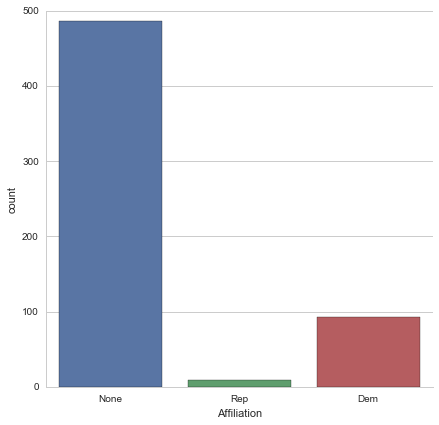

In [6]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count', size = 6)

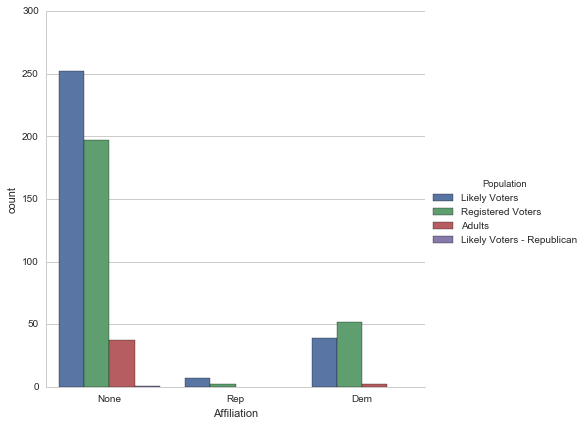

In [7]:
sns.factorplot('Affiliation', hue='Population', data = poll_df, kind = 'count', size = 6)

### Did the poll results favor Romney or Obama?

In [13]:
avg = DataFrame(poll_df.mean())

avg.drop('Number of Observations', axis = 0, inplace = True)

avg.columns = ['Average']

avg

,Average
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [17]:
std = DataFrame(poll_df.std())

std.drop('Number of Observations', axis = 0, inplace = True)

std.columns = ['STD']

std

,STD
Obama,2.448627
Romney,2.927711
Undecided,3.702235


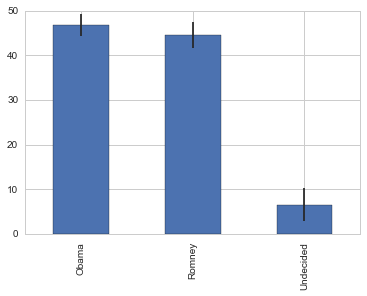

In [26]:
avg.plot(kind = 'bar', yerr = std['STD'], legend = False)

In [27]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg, std], axis = 1)

poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


### How do undecided voters effect the poll?

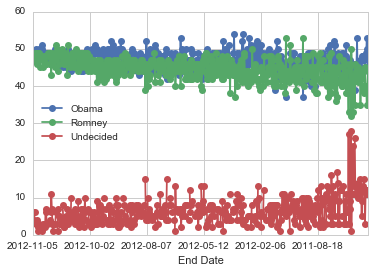

In [29]:
poll_df.plot(x='End Date', y=['Obama','Romney', 'Undecided'], marker = 'o')

### How did voter sentiment change over time?

In [31]:
poll_df['diff'] = (poll_df['Obama'] - poll_df['Romney'])/100.0

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000.0,Likely Voters,Live Phone,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000.0,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872.0,Likely Voters,Automated Phone,48,48,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041.0,Likely Voters,Internet,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500.0,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [34]:
# keep 0,1... as index, to release start date
new_poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
new_poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,diff
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


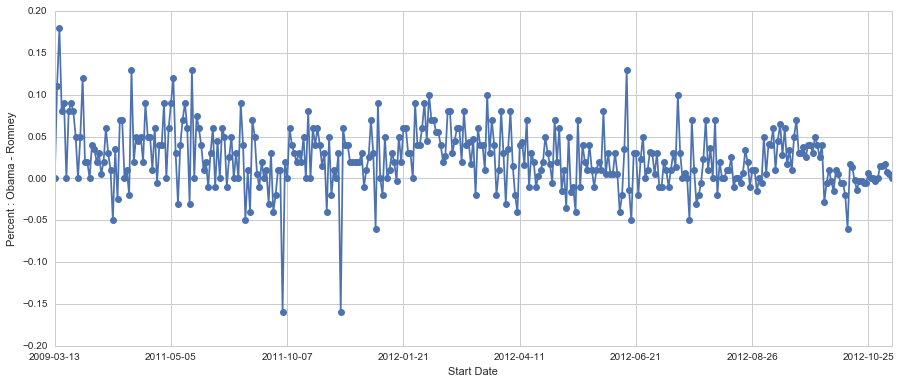

In [40]:
new_poll_df.plot('Start Date', 'diff', marker = 'o', figsize=(15,6), legend = False)
plt.ylabel('Percent : Obama - Romney')

In [52]:
# Set row count and xlimit list
row_in = 0
indlimit = []

for row in new_poll_df['Start Date']:
    if row[0:7] == '2012-10':
        indlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print min(indlimit)
print max(indlimit)

329
356


In [55]:
new_poll_df.ix[329:359].head()

,Start Date,Number of Observations,Obama,Romney,Undecided,diff
329,2012-10-01,1746.0,48.500000,46.000000,3.0,0.025000
330,2012-10-02,590.0,49.000000,45.000000,6.0,0.040000
331,2012-10-04,1061.5,45.833333,48.666667,6.0,-0.028333
332,2012-10-05,1000.0,46.000000,46.500000,7.0,-0.005000
333,2012-10-06,895.0,46.500000,45.500000,4.5,0.010000


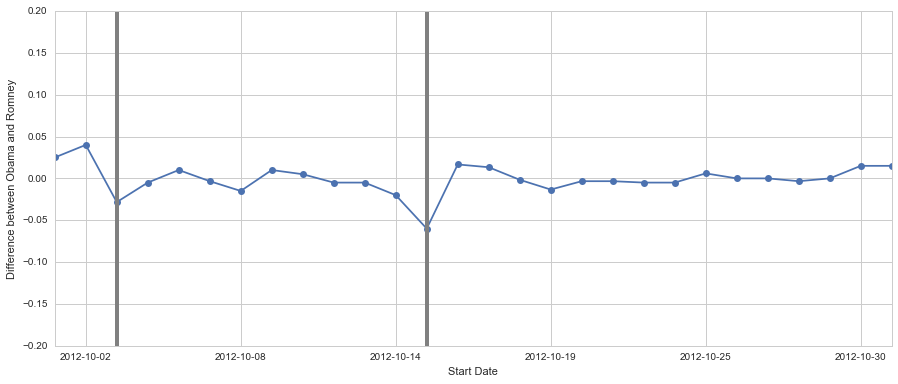

In [61]:
new_poll_df.plot('Start Date', 'diff', marker = 'o', xlim=[329, 356], legend = False, figsize=[15,6])
plt.ylabel('Difference between Obama and Romney')
# Oct 3rd
plt.axvline(x = 329 + 2, linewidth = 4, color = 'grey')
# Oct 15th
plt.axvline(x = 329 + 12, linewidth = 4, color = 'grey')

# Donor Data Set

This is going to be the biggest data set we've looked at so far. You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0) , then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What were the demographics of the donors?
5. Is there a pattern to donation amounts?

In [62]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

donor_df.info()

C:\Users\Chuang\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 68.8+ MB


In [63]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


### How much was donated and what was the average donation?

In [69]:
total = donor_df['contb_receipt_amt'].sum()

avg = donor_df['contb_receipt_amt'].mean()

Std = donor_df['contb_receipt_amt'].std()

print 'The total donation was %.2f dollars, and the average donation was %.2f dollars with a std of %.2f dollars' %(total, avg, Std)

The total donation was 298751395.14 dollars, and the average donation was 298.24 dollars with a std of 3749.67 dollars


The std value is so huge. Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [72]:
MIN = donor_df['contb_receipt_amt'].min()

print 'The minimum donation is %.2f dollars' %(MIN)

The minimum donation is -30800.00 dollars


The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [80]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor = top_donor[top_donor > 0] # To get ride of negative values

top_donor.sort_values(ascending=False, inplace = True)

top_donor.value_counts().head(10) # Top 10 donation value counts

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

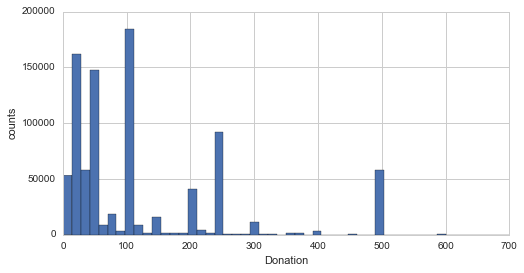

In [89]:
common_donor = top_donor[top_donor < 700]
common_donor.hist(bins = 50, figsize=(8,4))
plt.xlabel('Donation')
plt.ylabel('counts')

### How did the donations differ between candidates?

In [91]:
# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()

print candidates

['Bachmann, Michelle' 'Romney, Mitt' 'Obama, Barack'
 "Roemer, Charles E. 'Buddy' III" 'Pawlenty, Timothy' 'Johnson, Gary Earl'
 'Paul, Ron' 'Santorum, Rick' 'Cain, Herman' 'Gingrich, Newt'
 'McCotter, Thaddeus G' 'Huntsman, Jon' 'Perry, Rick']


In [93]:
# Add a Party column in the dataframe
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [94]:
# Clear refunds which gets ride of negative donation
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [95]:
# Groupby candidate and then displayt the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

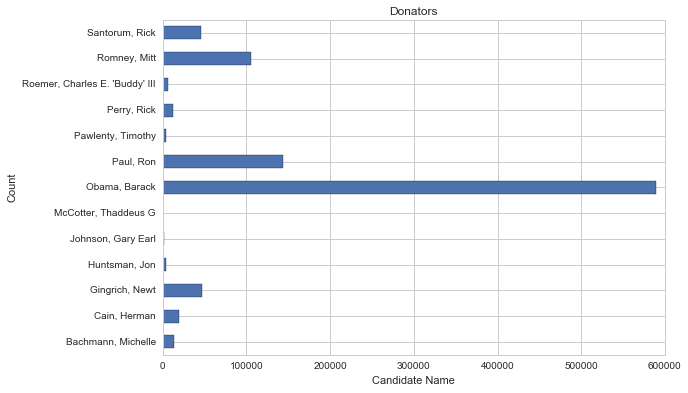

In [106]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count().plot(kind = 'barh',figsize=(9,6))
plt.xlabel('Candidate Name')
plt.ylabel('Count')
plt.title('Donators')

In [96]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

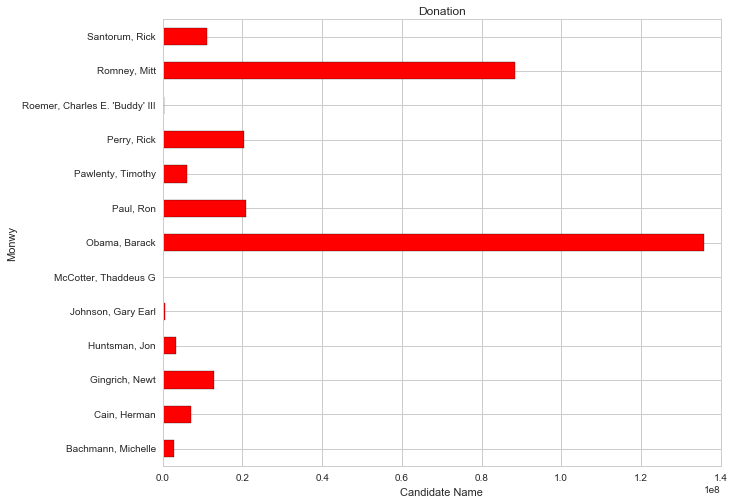

In [105]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().plot(kind = 'barh',figsize=(10,8), color = 'red')
plt.xlabel('Candidate Name')
plt.ylabel('Monwy')
plt.title('Donation')

### How did the donations differ between Democrats and Republicans?

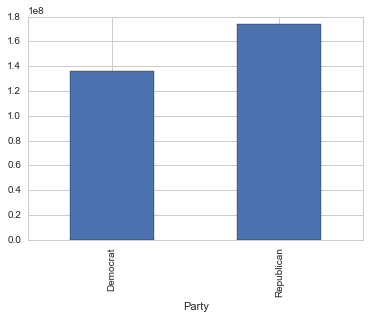

In [107]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')

### What were the demographics of the donors?

In [126]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table(values = 'contb_receipt_amt',index='contbr_occupation',columns='Party', aggfunc='sum')

occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [127]:
# Check size
occupation_df.shape

(45067, 2)

In [128]:
# So let's set our cut off at 1 million dollars.
occupation_df = occupation_df[occupation_df.sum(axis = 1) > 1000000]

occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


In [129]:
# To check the index
occupation_df.index.values

array(['ATTORNEY', 'BANKER', 'BUSINESS OWNER', 'C.E.O.', 'CEO', 'CHAIRMAN',
       'CONSULTANT', 'ENGINEER', 'EXECUTIVE', 'FINANCE', 'HOMEMAKER',
       'INFORMATION REQUESTED', 'INFORMATION REQUESTED PER BEST EFFORTS',
       'INVESTMENTS', 'INVESTOR', 'LAWYER', 'MANAGER', 'NOT EMPLOYED',
       'OWNER', 'PARTNER', 'PHYSICIAN', 'PRESIDENT', 'PROFESSOR',
       'REAL ESTATE', 'RETIRED', 'SALES', 'SELF-EMPLOYED', 'STUDENT',
       'TEACHER', 'VICE PRESIDENT', 'WRITER'], dtype=object)

1. INFORMATION REQUESTED and INFORMATION REQUESTED PER BEST EFFORTS shoulded be deleted
2. combine CEO wirh C.E.O

In [130]:
# 1st mistake
occupation_df.drop(['INFORMATION REQUESTED','INFORMATION REQUESTED PER BEST EFFORTS'],inplace=True)

# 2nd mistake
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace = True)

occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


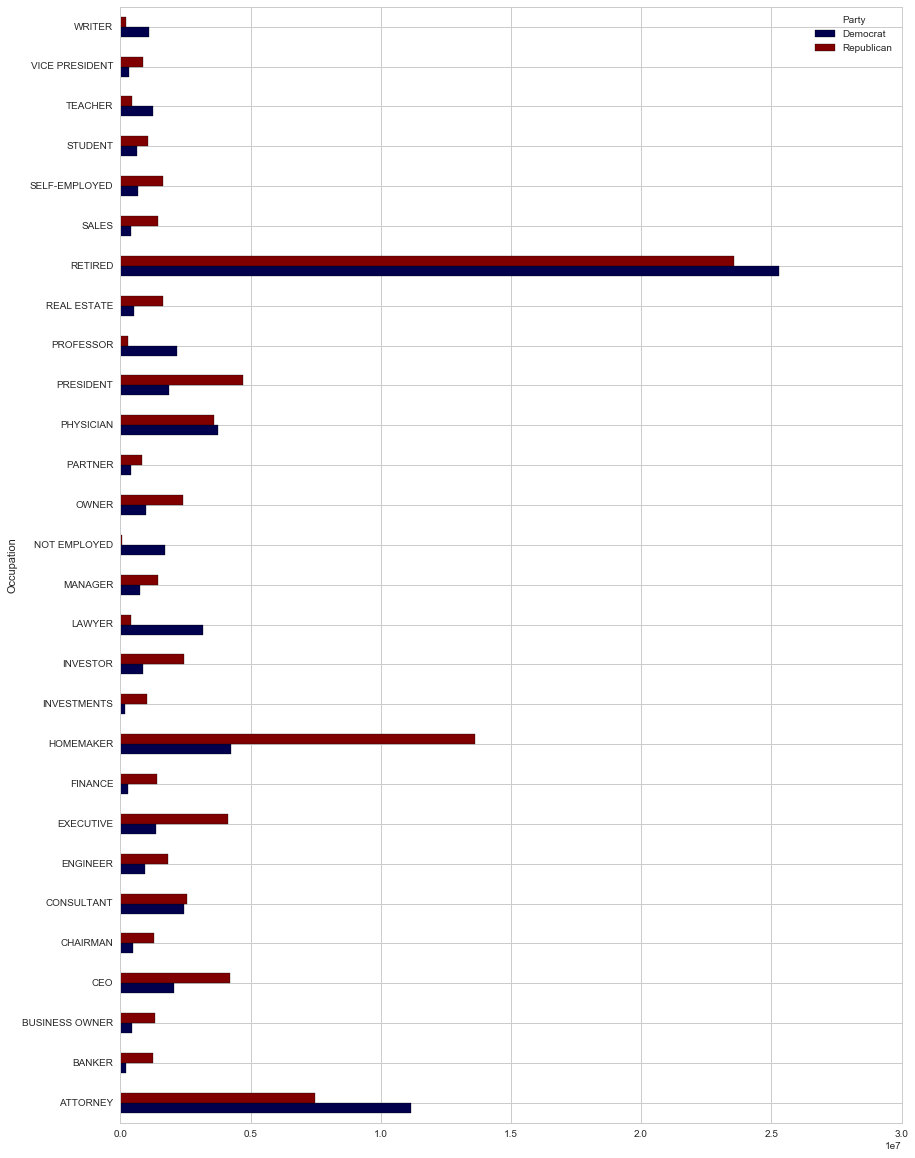

In [135]:
occupation_df.plot(kind = 'barh', figsize=(14,20), cmap = 'seismic')
plt.ylabel('Occupation')